# Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from pprint import pprint
from random import uniform as rand
%matplotlib inline

# Import data

Import the given excel file.

In [4]:
data_df = pd.read_excel('./data_case.xlsx', index_col='Date')
data_df = data_df.reindex(sorted(data_df.columns), axis=1)
data_df.head()

,Commodities,Equity,Fixed income,Hedge Funds,Real Estate
Date,,,,,
2004-12-31,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-07,0.061548,0.014354,0.019900,0.028100,-0.007989
2005-01-14,0.037780,-0.003776,0.003577,-0.003210,-0.007760
2005-01-21,0.007729,-0.007996,0.001278,0.001171,0.009977
2005-01-28,-0.013148,0.006571,0.002871,0.001559,-0.018529


<br>

# Question 1

# How did each of the asset classes performed throughout the whole sample period?

Visualization of the classes:

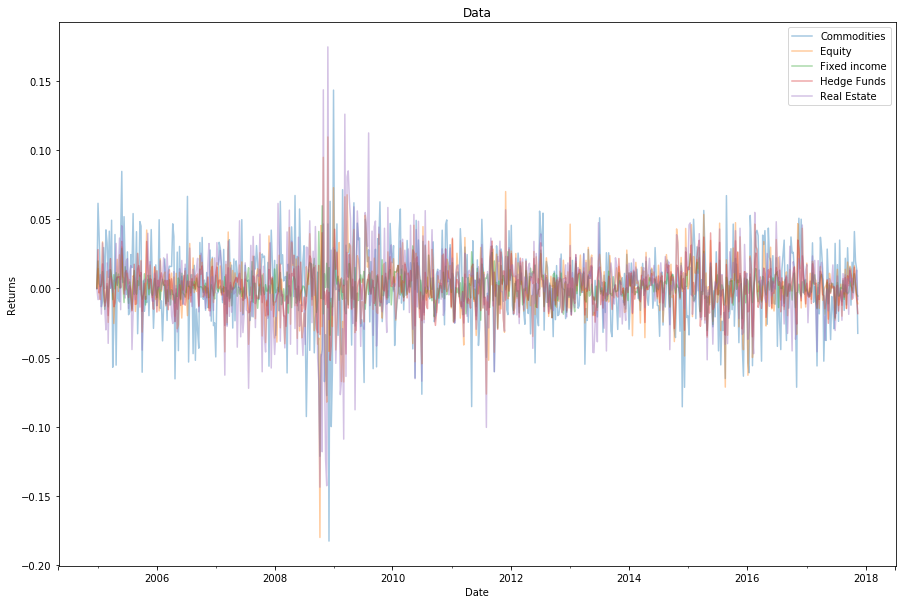

In [5]:
data_df.plot(alpha=.4, figsize = (15,10), title='Data')
plt.ylabel('Returns');

# Historical returns and volatilities

Calculate the means of the returns and the respective volatilities for the 5 classes given.

Firstly, returns:

In [4]:
return_mean = data_df.mean()
annualised_return = return_mean * 52
annualised_return

Commodities     0.057280
Equity          0.093558
Fixed income    0.044531
Hedge Funds     0.023070
Real Estate     0.086696
dtype: float64

Secondly, standard deviations:

In [5]:
return_stdev = data_df.std()
annualised_stdev = return_stdev * np.sqrt(52)
annualised_stdev

Commodities     0.214509
Equity          0.163519
Fixed income    0.070714
Hedge Funds     0.097795
Real Estate     0.207877
dtype: float64

Let us check the relatioships between E(return) and σ:

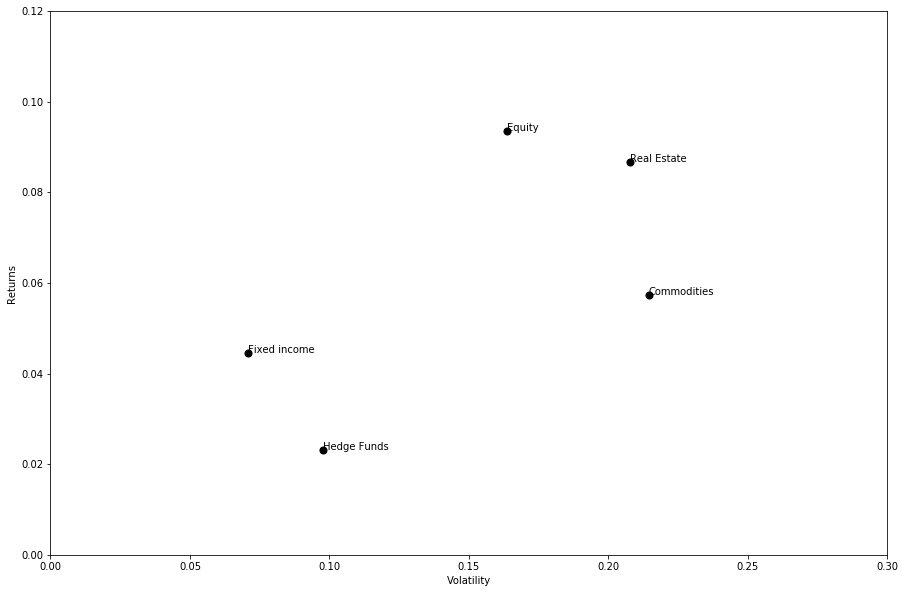

In [6]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(annualised_stdev, annualised_return, marker="o",color='xkcd:black',s=50)
for i, txt in enumerate(data_df.columns.tolist()):
    ax.annotate(txt, (annualised_stdev.tolist()[i],annualised_return.tolist()[i]))
plt.ylim((0.00,0.12))
plt.xlim((0.00,0.3))
plt.xlabel('Volatility')
plt.ylabel('Returns');

<br>

# Question 2

# If there are no restrictions on short sales what would be the tangency portfolio? And if the investor is restricted on short sales? Compare the two portfolios.

### With no restrictions

Given that the risk free rate is 3%:

In [28]:
r_f = .03

Set number of runs of random portfolio weights:

In [29]:
num_portfolios = 10000000

Set some variables:

In [30]:
#list of stocks in portfolio
stocks = data_df.columns.tolist()

#specify returns dataframe
returns = data_df
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

__ Calculate Returns, Volatility, SR, and weights for the 5 classes __

In [31]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.uniform(-2,2,5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * (365/7)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(365/7)
 
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio
    results[2,i] = (results[0,i]-r_f) / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

Convert results array to Pandas DataFrame:

In [32]:
results_frame_sl = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame_sl.head()

,ret,stdev,sharpe,Commodities,Equity,Fixed income,Hedge Funds,Real Estate
0,-0.633025,1.578892,-0.419930,0.641736,-1.539902,-5.694060,14.595055,-7.002829
1,0.022911,0.139626,-0.050773,-0.431353,0.351411,0.363116,1.000171,-0.283346
2,-0.000453,0.526882,-0.057798,2.339189,-1.603204,-2.590761,1.832194,1.022582
3,-0.382750,1.973068,-0.209192,-3.592082,6.902850,-0.610401,10.171372,-11.871738
4,0.365856,1.796442,0.186956,-8.533784,10.693441,0.492528,0.400608,-2.052793


Get Sharpe ratio and Minimum Variance Portfolio

In [33]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port_sl = results_frame_sl.iloc[results_frame_sl['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port_sl = results_frame_sl.iloc[results_frame_sl['stdev'].idxmin()]

__ Minimum Variance Portfolio __

In [34]:
print('Standard Deviation of the Minimum Variance Portfolio:', min_vol_port_sl[1])

Standard Deviation of the Minimum Variance Portfolio: 0.0624041344271


Weights:

In [35]:
print(min_vol_port_sl[3:]*100)

Commodities       7.498592
Equity           22.756179
Fixed income    107.627172
Hedge Funds     -35.064965
Real Estate      -2.816978
Name: 5195959, dtype: float64


__ Sharpe Ratio __

In [36]:
print('Sharpe ratio:', min_vol_port_sl[2])

Sharpe ratio: 0.531279323898


Weights:

In [37]:
print(max_sharpe_port_sl[3:]*100)

Commodities       3.931018
Equity          110.976074
Fixed income    204.995673
Hedge Funds    -195.638414
Real Estate     -24.264351
Name: 7185337, dtype: float64


### With restrictions

Given that the risk free rate is 3%:

In [7]:
r_f = .03

Set number of runs of random portfolio weights:

In [8]:
num_portfolios = 5000000

Set some variables:

In [9]:
#list of stocks in portfolio
stocks = data_df.columns.tolist()

#specify returns dataframe
returns = data_df
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

__ Calculate Returns, Volatility, SR, and weights for the 5 classes __

In [10]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * (365/7)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt((365/7))
 
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio
    results[2,i] = (results[0,i]-r_f) / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

Convert results array to Pandas DataFrame:

In [11]:
results_frame_l = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame_l.head()

,ret,stdev,sharpe,Commodities,Equity,Fixed income,Hedge Funds,Real Estate
0,0.054087,0.090085,0.267379,0.009068,0.200449,0.319761,0.320361,0.150362
1,0.060247,0.108987,0.277528,0.290885,0.011159,0.319653,0.073176,0.305127
2,0.055870,0.098935,0.261486,0.175844,0.114588,0.243776,0.256401,0.209391
3,0.050716,0.086328,0.239974,0.091499,0.089844,0.331785,0.315180,0.171691
4,0.063315,0.111376,0.299122,0.175818,0.211882,0.191454,0.184893,0.235954


Get Sharpe ratio and Minimum Variance Portfolio

In [12]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port_l = results_frame_l.iloc[results_frame_l['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port_l = results_frame_l.iloc[results_frame_l['stdev'].idxmin()]

__Minimum Variance Portfolio__

In [13]:
print('Standard Deviation of the Minimum Variance Portfolio:', min_vol_port_l[1])

Standard Deviation of the Minimum Variance Portfolio: 0.0649373763003


Weights:

In [14]:
print(min_vol_port_l[3:]*100)

Commodities      5.771903
Equity          12.168967
Fixed income    80.817501
Hedge Funds      0.275098
Real Estate      0.966531
Name: 2179808, dtype: float64


__Sharpe Ratio__

In [15]:
print('Sharpe ratio:', min_vol_port_l[2])

Sharpe ratio: 0.334520395568


Weights:

In [16]:
print(max_sharpe_port_l[3:]*100)

Commodities      0.120352
Equity          49.755364
Fixed income    49.267668
Hedge Funds      0.110625
Real Estate      0.745991
Name: 385341, dtype: float64


<br>

# Question 3

# Assuming an investor with a quadratic function 𝑈𝑥 = 𝐸(𝑟) − × 𝜎 2 and a risk 2 aversion level (𝛾) of 6, what would be the optimal portfolio if Mr. Gonzalez has no restrictions on short sales? How does your answer change if he has restrictions on short sales? Compare the two recommendations and analyze how they behave for different levels of risk aversion.

### With no restrictions

__ Optimal Portfolio__

This is how our tangency portfolio looks like:

In [38]:
max_sharpe_port_sl

ret             0.131556
stdev           0.117819
sharpe          0.861970
Commodities     0.039310
Equity          1.109761
Fixed income    2.049957
Hedge Funds    -1.956384
Real Estate    -0.242644
Name: 7185337, dtype: float64

We know that the investor has a Investor quadratic utility function with a risk aversion level ($\gamma$) of 6.
$$ U(r_P) = E(r_P)- \gamma \frac{\sigma_P^2}{2} $$

In [39]:
r_T_sl = max_sharpe_port_sl[0]
sigma_T_sl = max_sharpe_port_sl[1]
r_f = r_f
gamma = 6

To find optimal portfolio choice:
$$ w_T = \frac{r_T-r_f}{\gamma \sigma_T^2} $$

In [40]:
w_T_sl = (r_T_sl-r_f)/(gamma*(sigma_T_sl**2))

In [41]:
print('Optimal weight on the tangency portfolio:', round(w_T_sl,2))

Optimal weight on the tangency portfolio: 1.22


__ Expected return:__

In [42]:
E_o_sl = w_T_sl*r_T_sl + (1-w_T_sl)*r_f

In [43]:
print('Expected return:', round(E_o_sl*100,2),'%')

Expected return: 15.38 %


__ Standard deviation:__

In [44]:
sigma_o_sl = w_T_sl*sigma_T_sl

In [45]:
print('Standard Deviation:', round(sigma_o_sl*100,2),'%')

Standard Deviation: 14.37 %


__ Utility: __

In [46]:
U_o_sl = E_o_sl - gamma*(sigma_o_sl**2)/2
print('Utility:', round(U_o_sl,2))

Utility: 0.09


__ Portfolios graph __

In [47]:
def graph_formulas(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)
    plt.plot(x, y)  

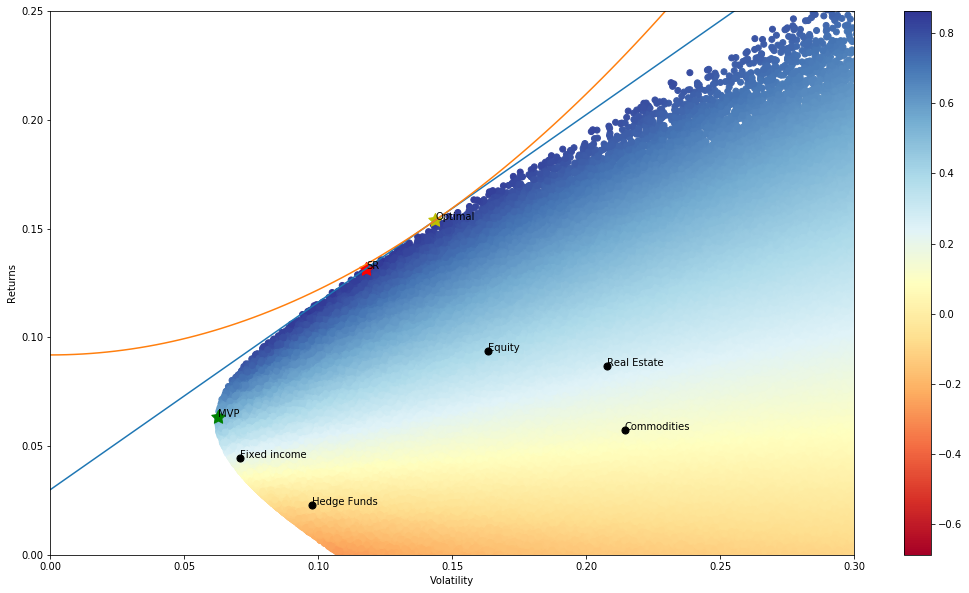

In [48]:
# Set configuration of the graph
plt.figure(figsize=(18, 10))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.ylim((0.00,0.25))
plt.xlim((0.00,0.3))

# Create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame_sl.stdev,results_frame_sl.ret,c=results_frame_sl.sharpe,cmap='RdYlBu')    
plt.colorbar()

# Add classes
plt.scatter(annualised_stdev, annualised_return, marker="o",color='xkcd:black',s=50)
for i, txt in enumerate(data_df.columns.tolist()):
    plt.annotate(txt, (annualised_stdev.tolist()[i],annualised_return.tolist()[i]))

# Plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port_sl[1],min_vol_port_sl[0],marker=(5,1,0),color='g',s=200)
plt.annotate('MVP', (min_vol_port_sl[1],min_vol_port_sl[0]))    
    
# Plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port_sl[1],max_sharpe_port_sl[0],marker=(5,1,0),color='r',s=200)
plt.annotate('SR', (max_sharpe_port_sl[1],max_sharpe_port_sl[0]))
             
# Add CML line
graph_formulas(lambda x: (r_f + (max_sharpe_port_sl[0]-r_f)*(x/max_sharpe_port_sl[1])), np.linspace(0.0,0.3, 100))

# Add optimal portfolio 
plt.scatter(sigma_o_sl,E_o_sl,marker=(5,1,0),color='y',s=200)
plt.annotate('Optimal', (sigma_o_sl,E_o_sl))

# Add investors utility curve
graph_formulas(lambda x: (U_o_sl+gamma*(x**2)/2), np.linspace(0.0,0.3, 100))

plt.show();

### With restrictions

__Optimal Portfolio __

This is how our tangency portfolio looks like:

In [17]:
max_sharpe_port_l

ret             0.069421
stdev           0.091289
sharpe          0.431825
Commodities     0.001204
Equity          0.497554
Fixed income    0.492677
Hedge Funds     0.001106
Real Estate     0.007460
Name: 385341, dtype: float64

We know that the investor has a Investor quadratic utility function with a risk aversion level ($\gamma$) of 6.
$$ U(r_P) = E(r_P)- \gamma \frac{\sigma_P^2}{2} $$

In [18]:
r_T_l = max_sharpe_port_l[0]
sigma_T_l = max_sharpe_port_l[1]
r_f = r_f
gamma = 6

To find optimal portfolio choice:
$$ w_T = \frac{r_T-r_f}{\gamma \sigma_T^2} $$

In [19]:
w_T_l = (r_T_l-r_f)/(gamma*(sigma_T_l**2))

In [20]:
print('Optimal weight on the tangency portfolio:', round(w_T_l,2))

Optimal weight on the tangency portfolio: 0.79


__ Expected return: __

In [21]:
E_o_l = w_T_l*r_T_l + (1-w_T_l)*r_f

In [22]:
print('Expected return:', round(E_o_l*100,2),'%')

Expected return: 6.11 %


__ Standard deviation:__

In [23]:
sigma_o_l = w_T_l*sigma_T_l

In [24]:
print('Standard Deviation:', round(sigma_o_l*100,2),'%')

Standard Deviation: 7.2 %


Also, his utility:

In [25]:
U_o_l = E_o_l - gamma*(sigma_o_l**2)/2
print('Utility:', round(U_o_l,2))

Utility: 0.05


__ Portfolios graph __

In [26]:
def graph_formulas(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)
    plt.plot(x, y)  

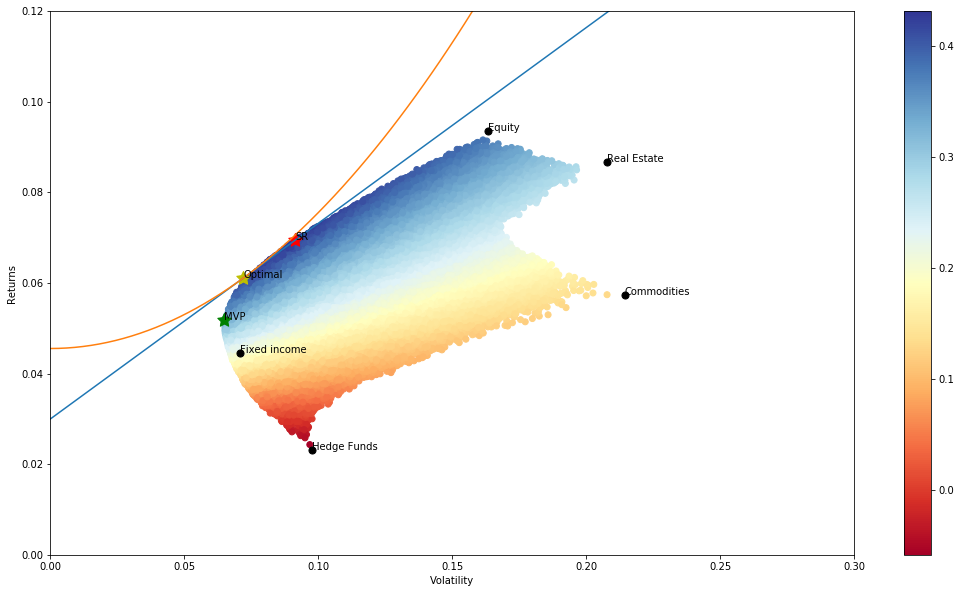

In [27]:
# Set configuration of the graph
plt.figure(figsize=(18, 10))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.ylim((0.00,0.12))
plt.xlim((0.00,0.3))

# Create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame_l.stdev,results_frame_l.ret,c=results_frame_l.sharpe,cmap='RdYlBu')    
plt.colorbar()

# Add classes
plt.scatter(annualised_stdev, annualised_return, marker="o",color='xkcd:black',s=50)
for i, txt in enumerate(data_df.columns.tolist()):
    plt.annotate(txt, (annualised_stdev.tolist()[i],annualised_return.tolist()[i]))

# Plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port_l[1],min_vol_port_l[0],marker=(5,1,0),color='g',s=200)
plt.annotate('MVP', (min_vol_port_l[1],min_vol_port_l[0]))    
    
# Plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port_l[1],max_sharpe_port_l[0],marker=(5,1,0),color='r',s=200)
plt.annotate('SR', (max_sharpe_port_l[1],max_sharpe_port_l[0]))
             
# Add CML line
graph_formulas(lambda x: (r_f + (max_sharpe_port_l[0]-r_f)*(x/max_sharpe_port_l[1])), np.linspace(0.0,0.3, 100))

# Add optimal portfolio 
plt.scatter(sigma_o_l,E_o_l,marker=(5,1,0),color='y',s=200)
plt.annotate('Optimal', (sigma_o_l,E_o_l))

# Add investors utility curve
graph_formulas(lambda x: (U_o_l+gamma*(x**2)/2), np.linspace(0.0,0.3, 100))

plt.show();

<br>

<br>

# Question 4

# What is the impact on your prior recommendations if the expected return changes? Perform a sensitivity analysis and comment on the differences.

<br>

# Question 5

# Finally, Mrs. Crusoe asks you to suggest 3 stocks and to estimate expected returns and standard deviation (total, systematic and idiosyncratic) on each of them according to the CAPM. Would you recommend the investment in any of the 3 stocks? Explain.

<br>